# CONTENTS:

## 1. Importing libraries and data

## 2. Data Cleaning (column names, missings, duplicates, outliers, mean/median/max)

## 3. Scatterplotting variables of interest + hypothesis

## 4. Data prep for regression analysis

## 5. Regression

## 6. Comparing how the regression fits the training set

## 7. Performance improvement after removing outliers

In [2]:
# __________________________________________

## 1. Importing libraries and data

In [3]:
# Importing libraries including 'scikit-learn' for regression:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Making charts displayed in the notebook without calling:

%matplotlib inline

In [11]:
# Importing 'Core_Metrics_Clean_Renamed_0missing.csv':

path = r'/Users/elena/Documents/Data Analytics Course/6. Advanced Analytics and Dashboard Design'

core_met = pd.read_csv(os.path.join(path, 'Core_Metrics_Clean_Renamed_0missing.csv'))

## 2. Data Cleaning

In [12]:
# Checking the columns names:

core_met.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Date,State,State ID,Median Listing Price,No. Active Listings,Median Days on Market,No. New Listings,No. Increased Price,No. Reduced Price,No. Pending Listings,Median Sq Ft Price,Median Sq Feet,Avg Listing Price,No. Total Listings,Pending Ratio
0,0,0,0,202301,Colorado,CO,577000,12401,82,6242,262,3834,5720.0,271,2129,1164082,18025,0.4613
1,1,1,1,202301,Wisconsin,WI,362400,5988,81,3278,66,1228,3518.0,197,1772,446116,9504,0.5875
2,2,2,2,202301,Nebraska,NE,347600,3117,75,1688,134,554,1991.0,169,2133,387946,5099,0.6387
3,3,3,3,202301,Kansas,KS,282450,4498,84,2414,162,936,2957.0,146,2016,396225,7479,0.6575
4,4,4,4,202301,West Virginia,WV,209950,2791,86,1220,48,636,1556.0,118,1726,289530,4355,0.5576


In [13]:
# Checking the shape of data set:

core_met.shape

(4029, 18)

In [16]:
# Checking for missing values:

core_met.isnull().sum()

Unnamed: 0.2             0
Unnamed: 0.1             0
Unnamed: 0               0
Date                     0
State                    0
State ID                 0
Median Listing Price     0
No. Active Listings      0
Median Days on Market    0
No. New Listings         0
No. Increased Price      0
No. Reduced Price        0
No. Pending Listings     0
Median Sq Ft Price       0
Median Sq Feet           0
Avg Listing Price        0
No. Total Listings       0
Pending Ratio            0
dtype: int64

#### Comments:

The missing values have been taken care of by inputing medians in the previous notebook. Hence, no missing values detected.

_________________________________

In [19]:
# Checking for duplicates:

dups = core_met.duplicated()

dups.shape

(4029,)

#### Comments:

No duplicates detected.

________________________________________

/Users/elena/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Median Days on Market', ylabel='Density'>

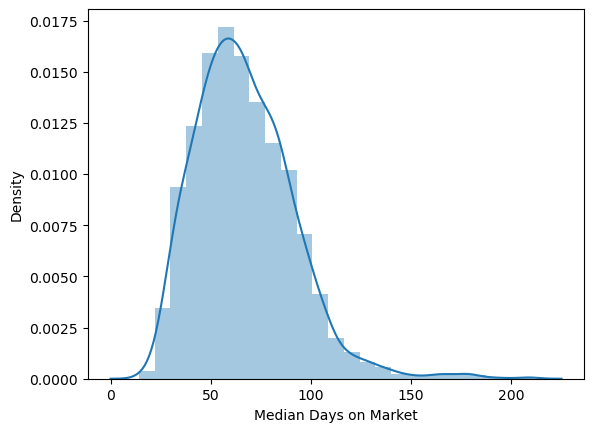

In [20]:
# Checking 'Median Days on Market' for extreme values:

sns.distplot(core_met['Median Days on Market'], bins=25)

#### Comments:

The histogram is right skewed. There are outliers beyond the 190-200 days mark.

__________________________________

/Users/elena/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Median Sq Ft Price', ylabel='Density'>

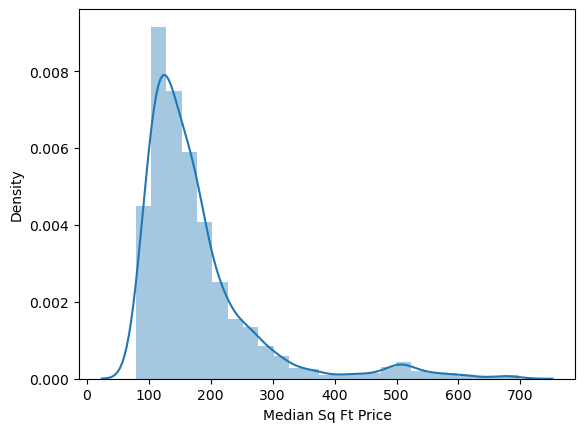

In [22]:
# Checking 'Median Sq Ft Price' for extreme values:

sns.distplot(core_met['Median Sq Ft Price'], bins=25)

#### Comments:

The histogram is right skewed. There are outliers beyond the $650 square foot price.

___________________________________________

In [24]:
# Checking for the mean, median and max for 'Median Days on Market':

core_met['Median Days on Market'].describe()

count    4029.000000
mean       66.771655
std        24.879910
min        14.000000
25%        49.000000
50%        64.000000
75%        81.000000
max       211.000000
Name: Median Days on Market, dtype: float64

In [25]:
# Checking for the mean, median and max for 'Median Sq Ft Price':

core_met['Median Sq Ft Price'].describe()

count    4029.000000
mean      177.662199
std        96.455532
min        79.000000
25%       119.000000
50%       150.000000
75%       195.000000
max       697.000000
Name: Median Sq Ft Price, dtype: float64

## 3. Scatterplotting variables of interest + hypothesis

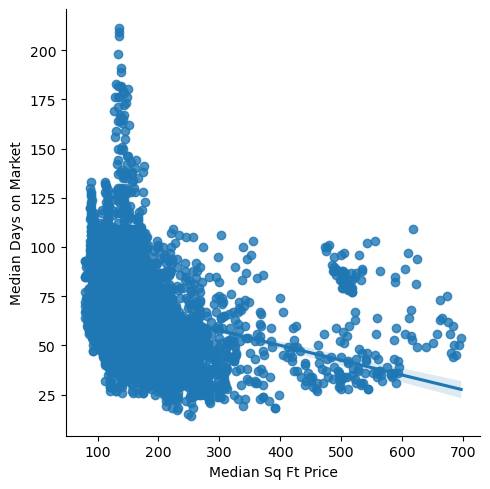

In [94]:
# Making a scatter plot between the 'Median SF Ft Price' and 'Median Days on Market':

sns.lmplot(x = 'Median Sq Ft Price', y = 'Median Days on Market', data = core_met)

#### Hypothesis:

The higher the price per square foot is, the fewer days the property is going to stay on the market.

___________________________________________________________________

## 4. Data prep for regression analysis

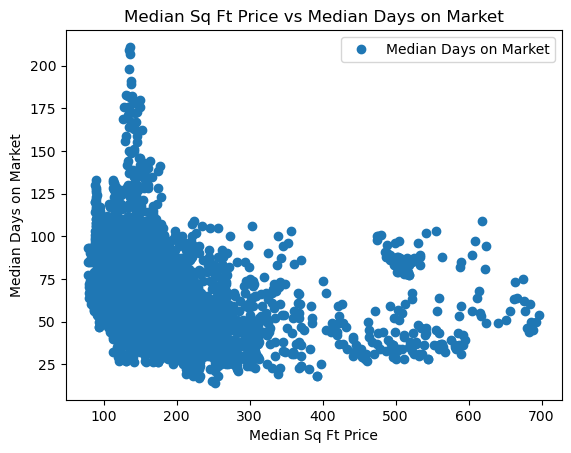

In [36]:
# Creating a acatterplot using matplotlib for 'Median Days on Market' vs. 'Median Sq Ft Price':

core_met.plot(x = 'Median Sq Ft Price', y = 'Median Days on Market', style = 'o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Median Sq Ft Price vs Median Days on Market')
plt.xlabel('Median Sq Ft Price')
plt.ylabel('Median Days on Market')
plt.show()


In [28]:
# Reshaping the variable into NumPy arrays and putting them into separate objects:

X = core_met['Median Sq Ft Price'].values.reshape(-1,1)

y = core_met['Median Days on Market'].values.reshape(-1,1)

In [29]:
X

array([[271],
       [197],
       [169],
       ...,
       [ 93],
       [ 92],
       [119]])

In [30]:
y

array([[82],
       [81],
       [75],
       ...,
       [75],
       [89],
       [85]])

In [31]:
# Splitting data into a training set and a test set:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 5. Regression analysis

In [33]:
# Creating a regression object:

regression = LinearRegression()

In [34]:
# Fitting the regression object onto the training set:

regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predicting the values of y using X:

y_predicted = regression.predict(X_test)

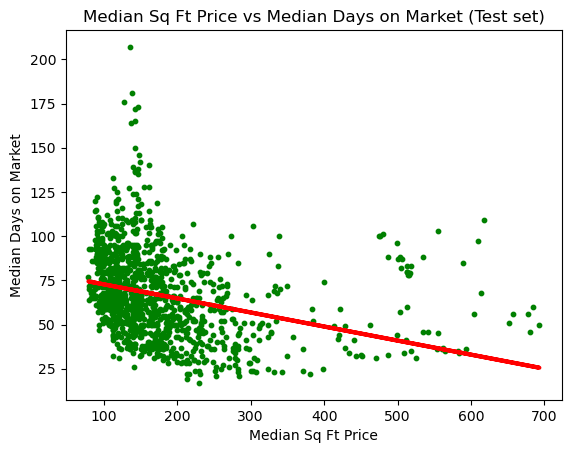

In [40]:
# Creating a scatterplot that shows regression line from the model on the test set:

plot_test = plt
plot_test.scatter(X_test, y_test, color = 'green', s = 10)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Median Sq Ft Price vs Median Days on Market (Test set)')
plot_test.xlabel('Median Sq Ft Price')
plot_test.ylabel('Median Days on Market')
plot_test.show()

#### Comments:

The regression line does not fit the data points very well. There are more than one linear trend in the data. Many data points are pretty far away from the regression line - there is a lot of variance.

_______________

In [43]:
# Creating objects that contain the model summary statistics:

    # Root mean squared error:
    
rmse = mean_squared_error(y_test, y_predicted)

    # r squared value:
    
r2 = r2_score(y_test, y_predicted)

In [44]:
# Evaluating the model performance through assessing the model summary statistics:

print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[-0.07951701]]
Mean squared error:  555.6376724984278
R2 score:  0.06915249948086644


#### Comments:

The Slope - shows negative relationship: the higher the price per square foot of a property, the few number of days the property is going to stay on the market.

Mean squared error - quite large, meaning that data points are located quite far away from the regression line, making it a bad tool for prediction on the data like this.

r2 score of 0.06 is very low for the model to be a good fit to the data.

_____________________________

In [51]:
# Creating a dataframe comparing the actual and predicted values of y:

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

data.head(30)

,Actual,Predicted
0,56,66.858528
1,85,68.051283
2,51,64.552534
3,86,74.015058
4,69,69.323555
5,56,32.666215
6,35,58.747793
7,52,61.848956
8,62,68.687419
9,103,71.868099


#### Comments:

Taking an actual look at the differences between the predicted and actual values of y serves as an additional proof that our model is not a great fit for explaining the relationship between square footage price and number of days on the market. The exhisting relationship doesn't follow a straight line - hence linear regression will not allow for accurate prediciton.

________________________________________

#### Comments on possible data bias:

One of the data bias stems from the fact that the original data, sourced form https://www.realtor.com/research/data/, does not include data on FSBO (for sale by owner) properties. "FSBOs accounted for 10% of home sales in 2021." - https://www.nar.realtor/research-and-statistics/quick-real-estate-statistics

_____________________________________

## 6. Comparing how the regression fits the training set

In [52]:
# Predict the values of y using X_train:

y_predicted_train = regression.predict(X_train)

In [57]:
# Evaluating the model performance through assessing the model summary statistics on the training set:

rmse = mean_squared_error(y_train, y_predicted_train)

r2 = r2_score(y_train, y_predicted_train)

print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[-0.07951701]]
Mean squared error:  570.9153696316145
R2 score:  0.09112077081738179


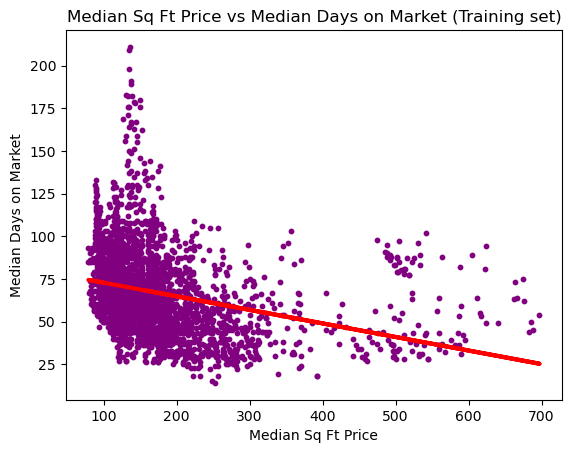

In [65]:
# Visualizing regression results on the training set:

plot_test = plt
plot_test.scatter(X_train, y_train, color = 'purple', s = 10)
plot_test.plot(X_train, y_predicted_train, color = 'red', linewidth = 3)
plot_test.title('Median Sq Ft Price vs Median Days on Market (Training set)')
plot_test.xlabel('Median Sq Ft Price')
plot_test.ylabel('Median Days on Market')
plot_test.show()

## 7. Performance improvement after removing outliers

In [66]:
# Removing the extreme values from the 'Median Days on Market' variable observed on the histogram above:

core_met_test = core_met[core_met['Median Days on Market'] <= 190]

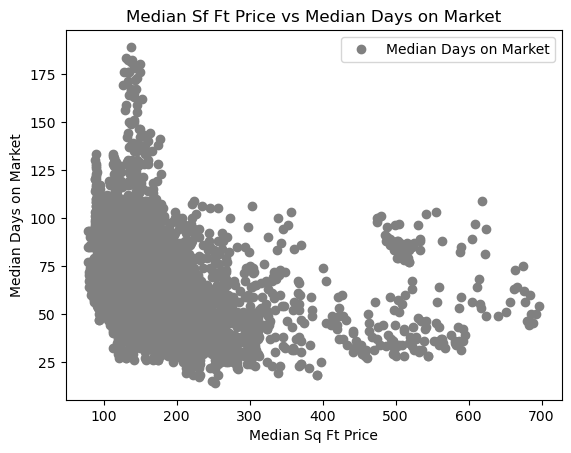

In [91]:
# Making a scatterplot to see how the data looks without the outliers:

core_met_test.plot(x = 'Median Sq Ft Price', y = 'Median Days on Market', color = 'grey', style = 'o')
plt.title('Median Sf Ft Price vs Median Days on Market')
plt.xlabel('Median Sq Ft Price')
plt.ylabel('Median Days on Market')
plt.show()

In [74]:
# Reshaping the varibles into arrays with reshape():

X_2 = core_met_test['Median Sq Ft Price'].values.reshape(-1,1)

y_2 = core_met_test['Median Days on Market'].values.reshape(-1,1)

In [76]:
# Splitting the data into a training set and a test set:

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.3, random_state = 0)

In [79]:
# Running and fitting a tegression:

regression = LinearRegression()

regression.fit(X_train_2, y_train_2)

LinearRegression()

In [80]:
# Predicting y values of the test set (without outliers):

y_predicted_2 = regression.predict(X_test_2)

In [82]:
# Evaluating model performance by running model summary statistics on the test set (without outliers):

rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [83]:
print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[-0.0757456]]
Mean squared error:  536.6959070299691
R2 score:  0.0803456130913015


#### Comments:

After removing the ouliers from the Days on Market variable the performance of the model changed as follows:

- The slope changed form -0.0795 to -0.0757 - the coeffifient did not change considerably keeping the negative dependency.
- The mean square error went from 555 to 536 - the change is not significant enough to considerably improve the model fit.
- The R2 score rose from 0.069 to 0.080, which is still very low for the model to be a reliable fit for the non-linear data.

__________________________________________

<function matplotlib.pyplot.show(close=None, block=None)>

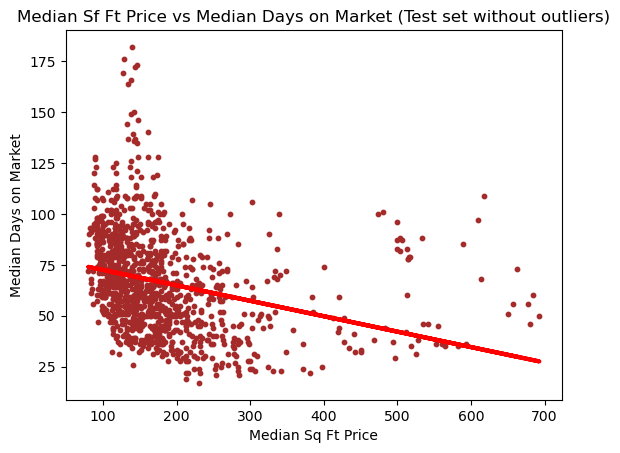

In [85]:
# Visualizing the test set (without outliers) results:

plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color = 'brown', s = 10)
plot_test.plot(X_test_2, y_predicted_2, color = 'red', linewidth = 3)
plot_test.title('Median Sf Ft Price vs Median Days on Market (Test set without outliers)')
plot_test.xlabel('Median Sq Ft Price')
plot_test.ylabel('Median Days on Market')
plot_test.show

In [88]:
# Creating a dataframe comparing the actual and predicted values of y:

data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,71,72.094129
1,89,66.564700
2,37,65.352771
3,67,70.124743
4,69,69.215796
5,65,71.488164
6,58,71.488164
7,89,71.185182
8,70,70.503471
9,52,69.443033


#### Comments:

The picture did not change much with the removal of the ouliers from the Median Days on Market variable. As expected from the summury statistics.

_______________________________________